In [1]:
#semi supervised learning
from sklearn.base import BaseEstimator
import numpy as np

class SelfLearningModel(BaseEstimator):
    def __init__(self, basemodel, max_iter=200, prob_threshold=0.8):
        self.model = basemodel
        self.max_iter = max_iter
        self.prob_threshold = prob_threshold
        
    def fit(self, X, y):
        labeled_mask = y != -1
        labeled_X, labeled_y = X[labeled_mask], y[labeled_mask]
        unlabeled_X = X[~labeled_mask]
        self.model.fit(labeled_X, labeled_y)
        
        for _ in range(self.max_iter):
            unlabeled_y = self.model.predict(unlabeled_X)
            unlabeled_prob = np.max(self.model.predict_proba(unlabeled_X), axis=1)
            confident_indices = unlabeled_prob > self.prob_threshold
            if not np.any(confident_indices):
                break
            labeled_X = np.vstack([labeled_X, unlabeled_X[confident_indices]])
            labeled_y = np.hstack([labeled_y, unlabeled_y[confident_indices]])
            unlabeled_X = unlabeled_X[~confident_indices]
        return self


In [ ]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [6]:
#Decision Tree, Random Forest, and Extremely Randomized Trees
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
et_classifier = ExtraTreesClassifier(n_estimators=90, random_state=42)

# Train the classifiers
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
et_classifier.fit(X_train, y_train)

# Make predictions
dt_pred = dt_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
et_pred = et_classifier.predict(X_test)

# Calculate accuracies
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
et_accuracy = accuracy_score(y_test, et_pred)

# Print the accuracies
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Extra Trees Accuracy:", et_accuracy)


Decision Tree Accuracy: 0.9666666666666667
Random Forest Accuracy: 0.9833333333333333
Extra Trees Accuracy: 0.9833333333333333


In [7]:
# adaboost 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base estimator (weak learner)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost classifier with DecisionTreeClassifier as the base estimator
ab_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Train the AdaBoost classifier
ab_classifier.fit(X_train, y_train)

# Make predictions
ab_pred = ab_classifier.predict(X_test)

# Calculate accuracy
ab_accuracy = accuracy_score(y_test, ab_pred)

# Print the accuracy
print("AdaBoost Accuracy:", ab_accuracy)


AdaBoost Accuracy: 1.0


/Users/rohansridhar/miniforge3/envs/google/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [1]:
from bs4 import BeautifulSoup

text = """\xa0@Flip\xa0how are you not ded"""

# Use BeautifulSoup to handle the special characters
soup = BeautifulSoup(text, "html.parser")
clean_text = soup.get_text()

print(clean_text)


 @Flip how are you not ded


In [2]:
import re

def replace_emails(text):
    email_regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    return re.sub(email_regex, '_EM', text)

text = "Send your feedback to example@email.com or contact us at info@company.com"
cleaned_text = replace_emails(text)
print(cleaned_text)


Send your feedback to _EM or contact us at _EM


In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

# Sample text
text = "This is a sample text for generating unigrams."

# Tokenize the text into words
words = word_tokenize(text)

# Generate unigrams
unigrams = list(ngrams(words, 1))

print(unigrams)


[('This',), ('is',), ('a',), ('sample',), ('text',), ('for',), ('generating',), ('unigrams',), ('.',)]


In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

# Sample text
text = "This is a sample text for generating bigrams."

# Tokenize the text into words
words = word_tokenize(text)

# Generate bigrams
bigrams = list(ngrams(words, 2))

print(bigrams)


[('This', 'is'), ('is', 'a'), ('a', 'sample'), ('sample', 'text'), ('text', 'for'), ('for', 'generating'), ('generating', 'bigrams'), ('bigrams', '.')]


In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download WordNet if you haven't already
nltk.download('wordnet')

# Sample text
text = "running shoes are important for running and runners"

# Tokenize the text into words
words = word_tokenize(text)

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to each word
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

# Join the lemmatized words back into a sentence
lemmatized_text = ' '.join(lemmatized_words)

print(lemmatized_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rohansridhar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


running shoe are important for running and runner


In [6]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Sample text
text = "running shoes are important for running and runners"

# Tokenize the text into words
words = word_tokenize(text)

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming to each word
stemmed_words = [porter_stemmer.stem(word) for word in words]

# Join the stemmed words back into a sentence
stemmed_text = ' '.join(stemmed_words)

print(stemmed_text)


run shoe are import for run and runner


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Sample text data (you can replace it with your own dataset)
texts = [
    "This is a good movie",
    "The plot was interesting",
    "I did not like the acting",
    "The movie was boring",
    "The acting was excellent"
]
# Corresponding labels
labels = [1, 1, 0, 0, 1]  # 1 for positive sentiment, 0 for negative sentiment

# Step 1: Vectorize the text data using Bag-of-Words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Step 3: Train a classifier (Logistic Regression in this case)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = classifier.predict(X_test)

# Step 5: Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.0


/Users/rohansridhar/miniforge3/envs/google/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


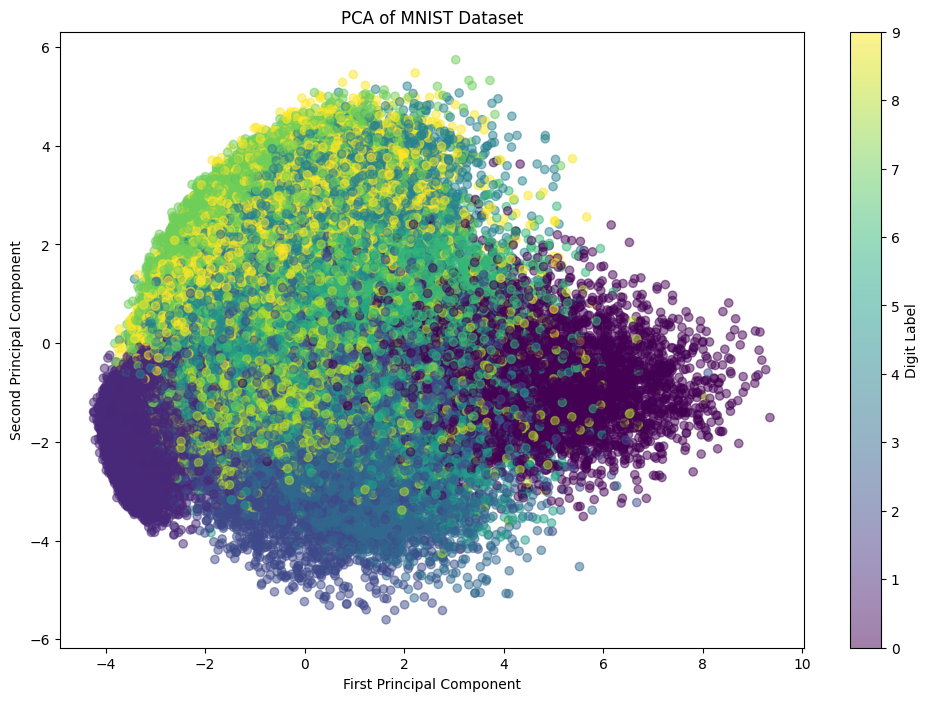

Explained variance ratio of the first 2 components: [0.09746116 0.07155445]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0  # Normalize the data
y = mnist.target.astype(int)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Digit Label')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of MNIST Dataset')
plt.show()

# Explain the variance ratio
print(f"Explained variance ratio of the first 2 components: {pca.explained_variance_ratio_}")


/Users/rohansridhar/miniforge3/envs/google/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rohansridhar/miniforge3/envs/google/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rohansridhar/miniforge3/envs/google/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rohansridhar/miniforge3/envs/google/lib/python3.10/site-packages/sklearn/cluster/

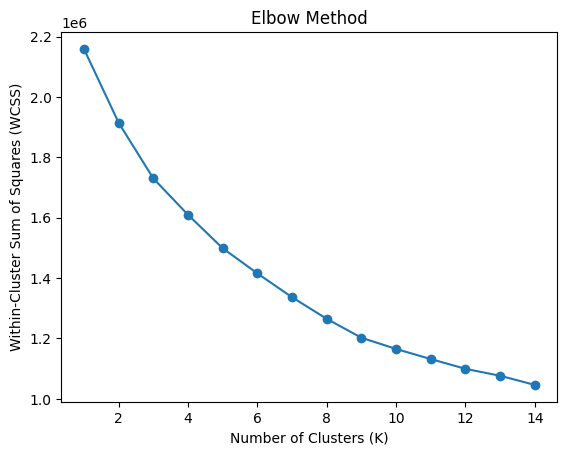

In [2]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
digits = load_digits()
X = digits.data

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define range of K values
k_values = range(1, 15)

# Initialize list to store within-cluster sum of squares (WCSS)
wcss = []

# Calculate WCSS for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


/Users/rohansridhar/miniforge3/envs/google/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rohansridhar/miniforge3/envs/google/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


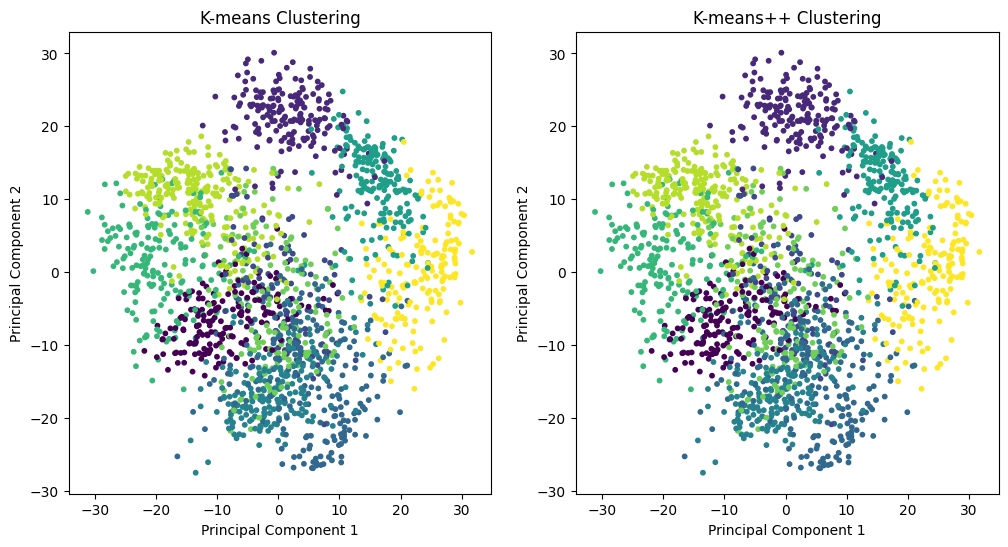

In [3]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

# K-means++ clustering
kmeans_pp = KMeans(n_clusters=10, init='k-means++', random_state=42)
kmeans_pp.fit(X)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for K-means
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot for K-means++
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pp.labels_, cmap='viridis', s=10)
plt.title('K-means++ Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


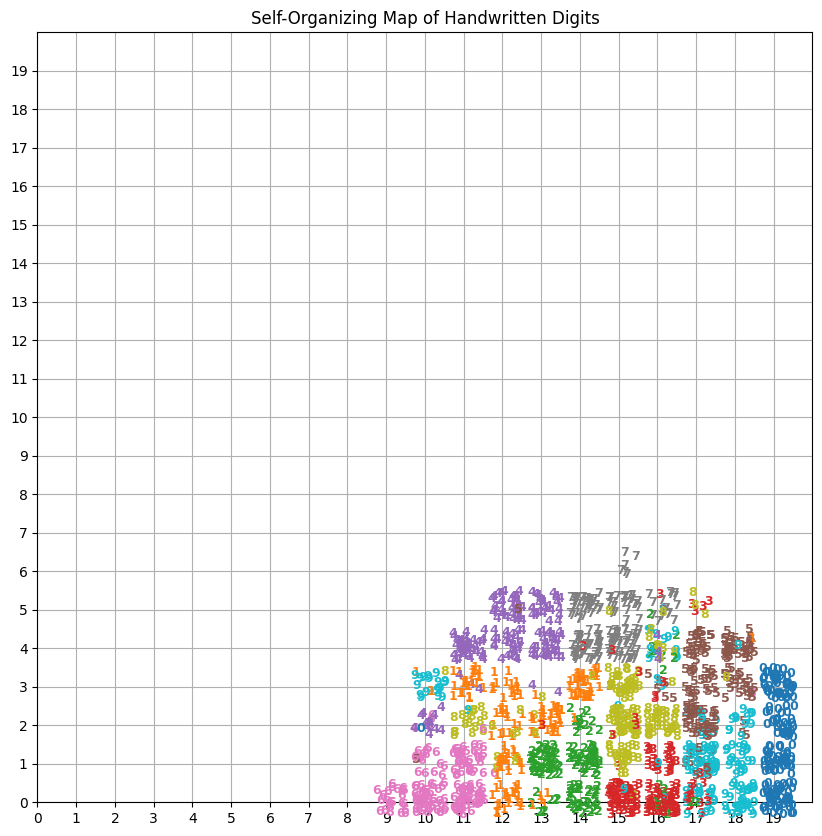

In [4]:
!pip install minisom
from sklearn.datasets import load_digits
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

# Normalize the data
X = X / np.max(X)

# Define the SOM parameters
som_width = 20
som_height = 20
input_dim = X.shape[1]
sigma = 1.0
learning_rate = 0.5
random_seed = 42

# Initialize the SOM
som = MiniSom(som_width, som_height, input_dim, sigma=sigma, learning_rate=learning_rate, random_seed=random_seed)

# Train the SOM
som.train_random(X, 1000)  # You can adjust the number of iterations

# Get the clustered labels for each data point
clustered_labels = np.array([som.winner(x) for x in X])

# Plotting
plt.figure(figsize=(10, 10))
for i, (x, label) in enumerate(zip(X, clustered_labels)):
    plt.text(label[0]+np.random.rand()*0.8-0.4, label[1]+np.random.rand()*0.8-0.4, str(y[i]),
             color=plt.cm.tab10(y[i] / 10.), fontdict={'weight': 'bold', 'size': 9})
plt.xticks(np.arange(som_width))
plt.yticks(np.arange(som_height))
plt.grid()
plt.xlim([0, som_width])
plt.ylim([0, som_height])
plt.title('Self-Organizing Map of Handwritten Digits')
plt.show()
